In [53]:
# Moving Average Crossing Strategy -                      live data feeds - system to determine PNL
#imports
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from functools import reduce
import datetime
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [54]:
# Importing the Data
myPath = r"C:\Users\rrain\Desktop\trading\Crude-Trading-System-Code\Crude-Trading-System\bb_crude_data.xlsx"
my_ohlc_data = pd.read_excel(myPath)# Converting to Array
my_ohlc_data.tail(20)
# my_ohlc_data = np.array(my_ohlc_data)

,Dates,Close,Open,High,Low
3280,2023-04-17,80.83,82.48,82.71,80.47
3281,2023-04-18,80.86,81.00,81.48,79.87
3282,2023-04-19,79.16,80.92,81.18,78.46
3283,2023-04-20,77.29,78.87,78.89,76.97
3284,2023-04-21,77.87,77.13,78.39,76.72
3285,2023-04-24,78.76,77.97,79.18,76.72
3286,2023-04-25,77.07,78.74,79.07,76.50
3287,2023-04-26,74.30,77.08,77.93,74.05
3288,2023-04-27,74.76,74.38,75.28,74.03
3289,2023-04-28,76.78,74.91,76.92,73.93


In [55]:
def SMA(data, ndays): 
    # SMA addition for each column - based on close price
    data["{0}SMA".format(ndays)] = data['Close'].rolling(ndays).mean()
    return data

def EMA(data,ndays):
    # EMA Calculation - preferred calc method for moving averages.
    data["{0}EMA".format(ndays)] = data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean()
    
    return data
    
def core_logic(data=pd.DataFrame()): #trading logic - generate a buy and sell signals
    # Generate signal: If 9SMA > 21MA
    data = data.set_index('Dates')
    
    # Account for NaN values
    data = data[data.index > '2010-05-10'] #start the rolling window at 5/10/2010
    
    # Create Signal & Position Column
    data['Signal'] = np.where(data['9EMA'] > data['21EMA'], 1, 0)
    data['Position'] = data['Signal'].diff()
    print(data.tail(15))
    return data

# creating the 9 & 21 Day moving averages
df = EMA(my_ohlc_data,9)
df = EMA(my_ohlc_data,21)

# create buy / sell signals
df = core_logic(data=df)

            Close   Open   High    Low       9EMA      21EMA  Signal  Position
Dates                                                                         
2023-04-24  78.76  77.97  79.18  76.72  79.307099  78.541482       1       0.0
2023-04-25  77.07  78.74  79.07  76.50  78.859679  78.407711       1       0.0
2023-04-26  74.30  77.08  77.93  74.05  77.947743  78.034282       0      -1.0
2023-04-27  74.76  74.38  75.28  74.03  77.310195  77.736620       0       0.0
2023-04-28  76.78  74.91  76.92  73.93  77.204156  77.649655       0       0.0
2023-05-01  75.66  76.66  76.69  74.53  76.895325  77.468777       0       0.0
2023-05-02  71.66  75.76  76.11  71.42  75.848260  76.940707       0       0.0
2023-05-03  68.60  71.56  71.79  67.95  74.398608  76.182461       0       0.0
2023-05-04  68.56  68.16  69.84  63.64  73.230886  75.489510       0       0.0
2023-05-05  71.34  68.70  71.81  68.48  72.852709  75.112281       0       0.0
2023-05-08  73.16  71.35  73.69  71.04  72.914167  7

In [56]:
df.head(30)

,Close,Open,High,Low,9EMA,21EMA,Signal,Position
Dates,,,,,,,,
2010-05-11,76.37,77.27,77.68,75.36,79.213426,81.027163,0,NaN
2010-05-12,75.65,75.89,77.00,74.75,78.495443,80.469868,0,0.0
2010-05-13,74.40,75.47,76.45,73.62,77.671491,79.848690,0,0.0
2010-05-14,71.61,73.99,74.13,70.83,76.453440,79.015086,0,0.0
2010-05-17,70.08,71.77,72.25,69.27,75.173918,78.120212,0,0.0
2010-05-18,69.41,70.50,72.52,68.91,74.017640,77.255850,0,0.0
2010-05-19,69.87,69.11,71.43,67.90,73.186102,76.528964,0,0.0
2010-05-20,68.01,71.20,71.29,64.24,72.148875,75.696808,0,0.0
2010-05-21,70.04,69.52,71.23,69.00,71.726446,75.147954,0,0.0


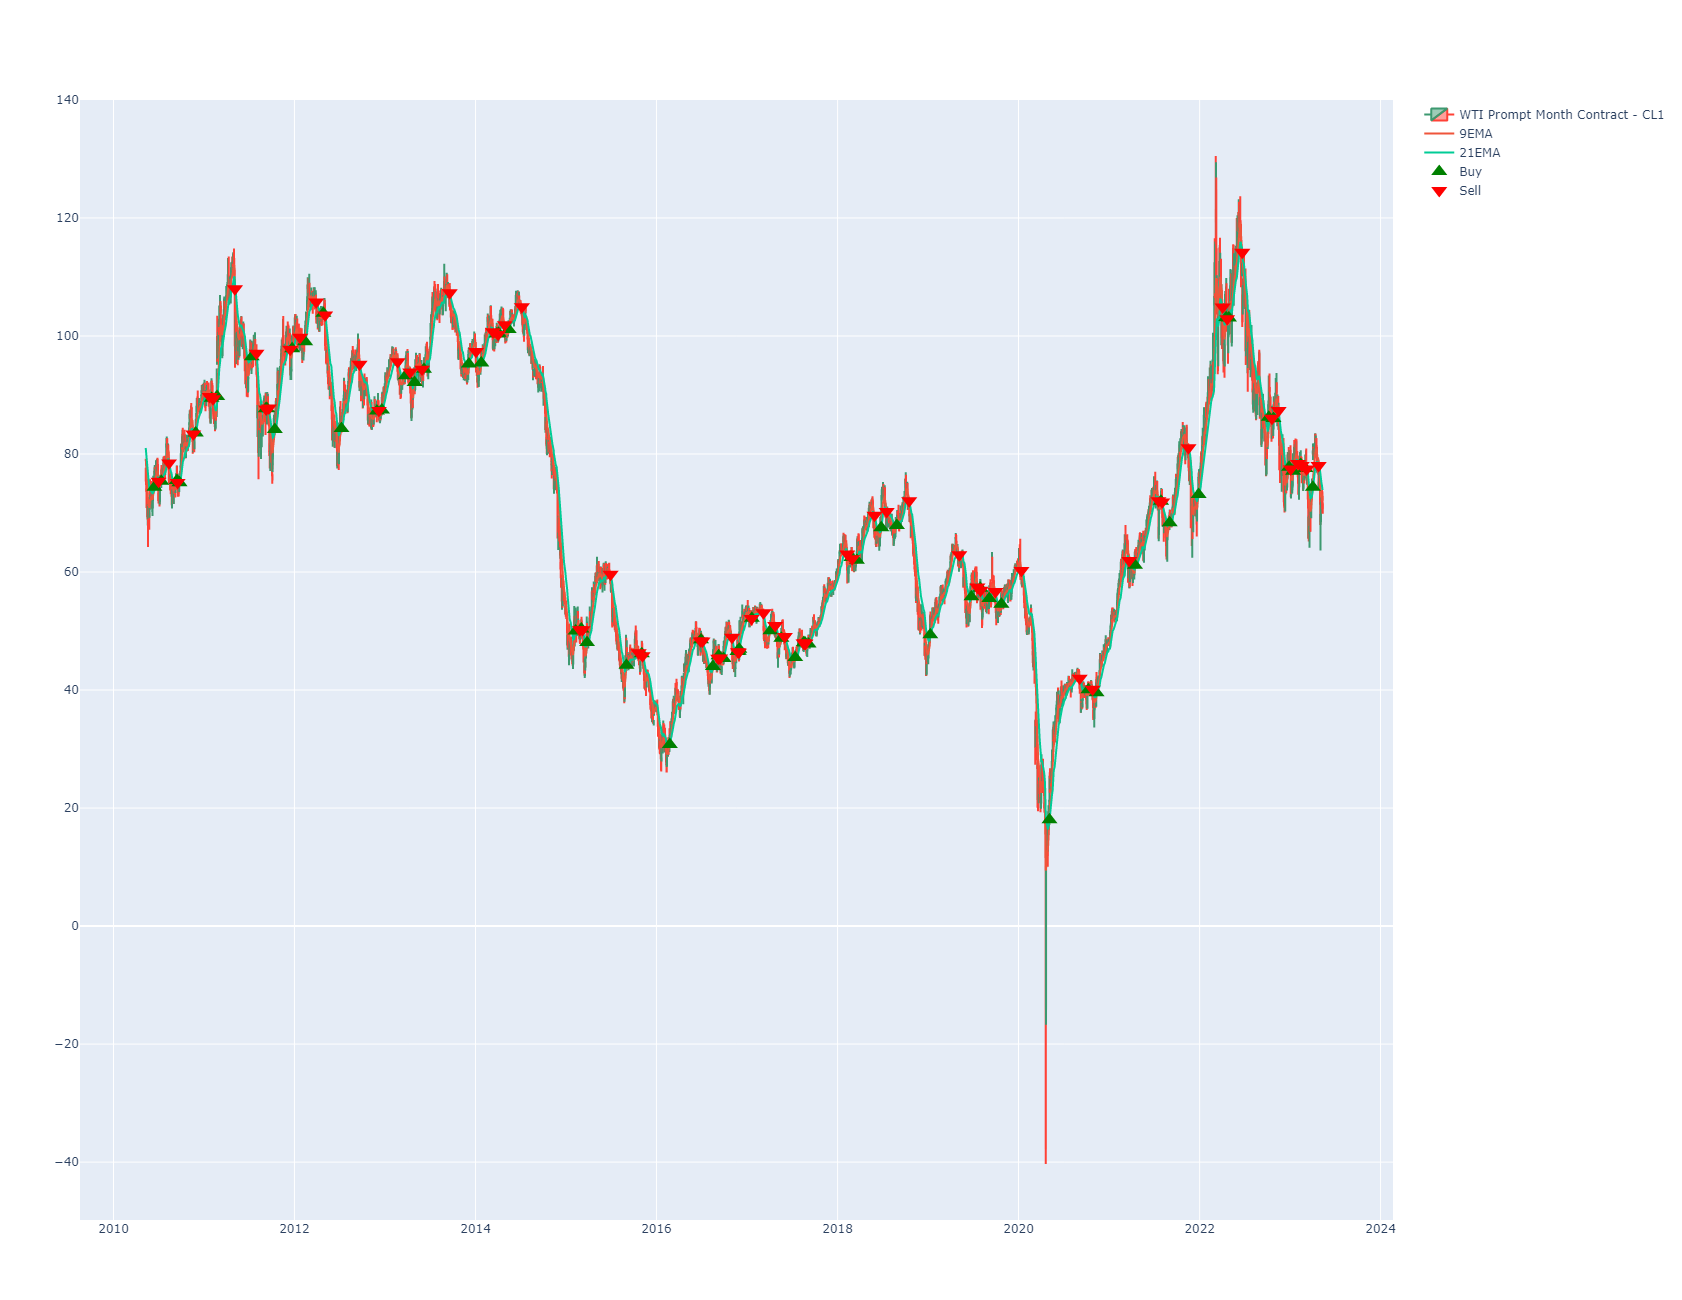

In [58]:
# simple candle chart

def ohlc_plot_sma(df):
    fig = go.Figure(data=[
                    go.Candlestick(
                        x=df.index,
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'], 
                        close=df['Close'],
                        name = 'WTI Prompt Month Contract - CL1'
                                        ),
                    go.Scatter(
                        x=df.index,
                        y=df['9EMA'],
                        name = '9EMA')]
                   )
                   
    fig.add_trace(go.Scatter(
                    x=df.index, 
                    y=df['21EMA'],
                    mode='lines',
                    name='21EMA')
                 
                 )
    # buy signals
    fig.add_trace(go.Scatter(
                    x=df[df['Position'] == 1].index, 
                    y=df['9EMA'][df['Position'] == 1],
                    mode='markers',
                    name='Buy',
                    marker_symbol='triangle-up',
                    marker_color='green',
                    marker_size=14))
    
    # sell signals
    fig.add_trace(go.Scatter(
                    x=df[df['Position'] == -1].index, 
                    y=df['21EMA'][df['Position'] == -1],
                    mode='markers',
                    name='Sell',
                    marker_symbol='triangle-down',
                    marker_color='red',
                    marker_size=14))
    
    fig.update_layout(xaxis_rangeslider_visible=False,width=1800, height=1300)
    fig.show()
ohlc_plot_sma(df=df)

In [ ]:
df = pd.DataFrame({'B': [0, 1, 2, np.NaN, 4]})
df

In [34]:
df.rolling(1).sum()

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [41]:
df.ewm(com=0.5).mean() #tweaking parameters - we don't need to understand all of these parameters when deploying a live system. To find trading Alpha, we will need to adjust these kinds of parameters here - such as com, span, etc. 
#start understanding what these parameters mean. 

,Close,Open,High,Low,9EMA,21EMA,Signal,Position
Dates,,,,,,,,
2010-05-11,76.370000,77.270000,77.680000,75.360000,79.213426,81.027163,0.000000e+00,NaN
2010-05-12,75.830000,76.235000,77.170000,74.902500,78.674939,80.609192,0.000000e+00,0.000000
2010-05-13,74.840000,75.705385,76.671538,74.014615,77.980244,80.082691,0.000000e+00,0.000000
2010-05-14,72.659750,74.547500,74.956000,71.865000,76.949652,79.362058,0.000000e+00,0.000000
2010-05-17,70.932810,72.688182,73.144545,70.127851,75.760938,78.530740,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...
2023-05-08,72.300872,70.585988,72.972414,69.863512,73.001781,75.073429,5.080526e-05,-0.000102
2023-05-09,73.240291,72.088663,73.510805,70.847837,73.049483,74.906780,1.693509e-05,-0.000034
2023-05-10,72.786764,73.082888,73.763602,71.482612,72.996939,74.714051,5.645029e-06,-0.000011
